In [2]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

from typing import Callable

## Functions

In [3]:
def square(x: ndarray) -> ndarray:
    """Returns the square of each element of the ndarray"""
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    """Returns the ndarray of the elements after applying leaky_relu on the input"""
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    """Evaluates the sigmoid function on the input array"""
    return 1 / (1 + np.exp(-x))

### Diagram

Text(0, 0.5, '$max(0.2\\times x, x)$')

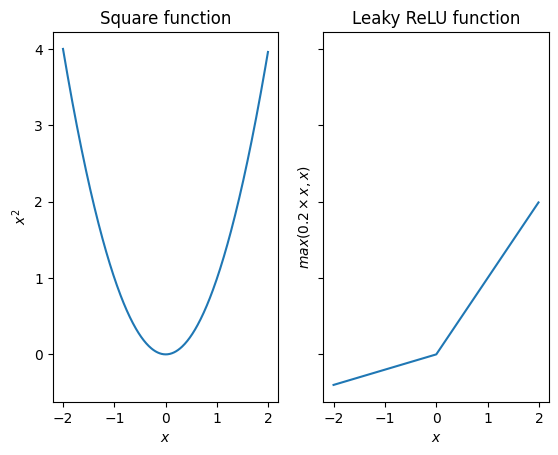

In [4]:
fig, ax = plt.subplots(1, 2, sharey=True)

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title("Square function")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$x^2$")

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title("Leaky ReLU function")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"$max(0.2\times x, x)$")

## Derivative

In [5]:
def deriv(func: Callable[[ndarray], ndarray],
         input_: ndarray, 
         diff: float = 0.001) -> ndarray:
    """
    Evaluates the derivative of a function "func" at every element of the "input_" array
    """
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

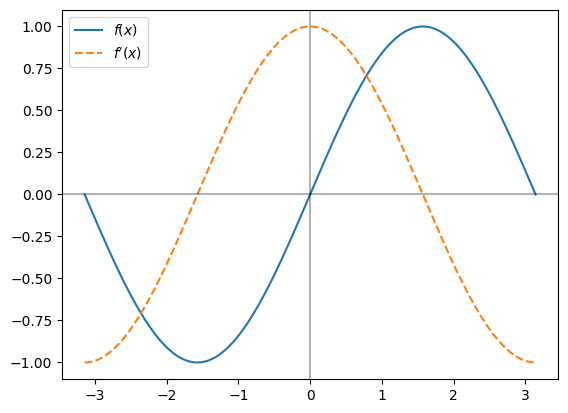

In [6]:
x = np.linspace(-np.pi, np.pi, 1000)

plt.plot(x, np.sin(x), label="$f(x)$") # function
plt.plot(x, deriv(np.sin, x), ls="--",  label="$f^\\prime(x)$") # derivative

plt.axhline(0, alpha=0.3, c="k")  # x - axis
plt.axvline(0, alpha=0.3, c="k")  # y - axis
plt.legend()
plt.show()

## Chain

In [7]:
Array_Function = Callable[[ndarray], ndarray]

Chain = list[Array_Function]

In [8]:
def chain_length_2(chain: Chain, x: ndarray) -> ndarray:
    """
    Evaluates two functions in a row on an array
    """
    assert len(chain) == 2, \
    "Length of the input chain should be 2"
    
    f1, f2 = chain
    return f2(f1(x))

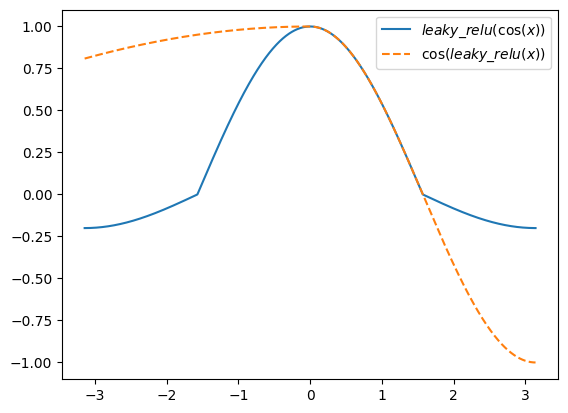

In [9]:
chain: Chain = [np.cos, leaky_relu]

plt.plot(x, chain_length_2(chain, x), label="$leaky\_relu(\\cos(x))$")
plt.plot(x, chain_length_2(chain[::-1], x), ls="--", label="$\\cos(leaky\_relu(x))$")

plt.legend()
plt.show()

## Chain Derivative

In [10]:
def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    """
    Using the chain rule to calculate derivative of the nested functions
    """
    assert len(chain) == 2, "Chain's length should be 2"
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"
    
    f1, f2 = chain
    
    f1_of_x = f1(input_range)
    
    # df1/dx
    df1dx = deriv(f1, input_range)
    
    # df2/du(f1(x))
    df2du = deriv(f2, f1_of_x)
    
    return df2du * df1dx

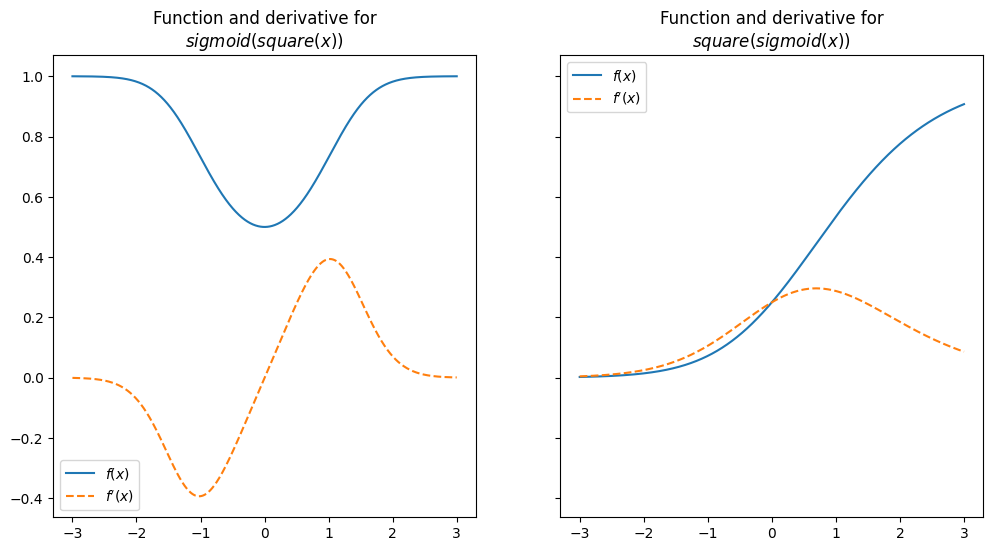

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

input_range: ndarray = np.linspace(-3, 3, 1000)

chain_1: Chain = [square, sigmoid]
chain_2: Chain = chain_1[::-1]

ax[0].plot(input_range, chain_length_2(chain_1, input_range), label="$f(x)$")
ax[0].plot(input_range, chain_deriv_2(chain_1, input_range), ls="--", label="$f^\prime(x)$")
ax[0].set_title("Function and derivative for\n$sigmoid(square(x))$")
ax[0].legend()

ax[1].plot(input_range, chain_length_2(chain_2, input_range), label="$f(x)$")
ax[1].plot(input_range, chain_deriv_2(chain_2, input_range), ls="--", label="$f^\prime(x)$")
ax[1].set_title("Function and derivative for\n$square(sigmoid(x))$")
ax[1].legend()

## Chain of length 3

In [12]:
def chain_length_3(chain: Chain, x: ndarray) -> ndarray:
    """
    Evaluates three functions in a row on an array
    """
    assert len(chain) == 3, \
    "Length of the input chain should be 3"
    
    f1, f2, f3 = chain
    return f3(f2(f1(x)))

### Derivative

In [13]:
def chain_deriv_3(chain: Chain, input_range: ndarray) -> ndarray:
    """
    Using the chain rule to calculate derivative of the nested functions
    """
    assert len(chain) == 3, "Chain's length should be 3"
    
    f1, f2, f3 = chain
    
    # f1(x)
    f1_of_x = f1(input_range)
    
    # f2(f1(x))
    f2_of_x = f2(f1_of_x)
    
    # df3/du(f2(f1(x)))
    df3du = deriv(f3, f2_of_x)
    
    # df2/du(f1(x))
    df2du = deriv(f2, f1_of_x)
    
    # df1/dx
    df1dx = deriv(f1, input_range)
    
    return df3du * df2du * df1dx

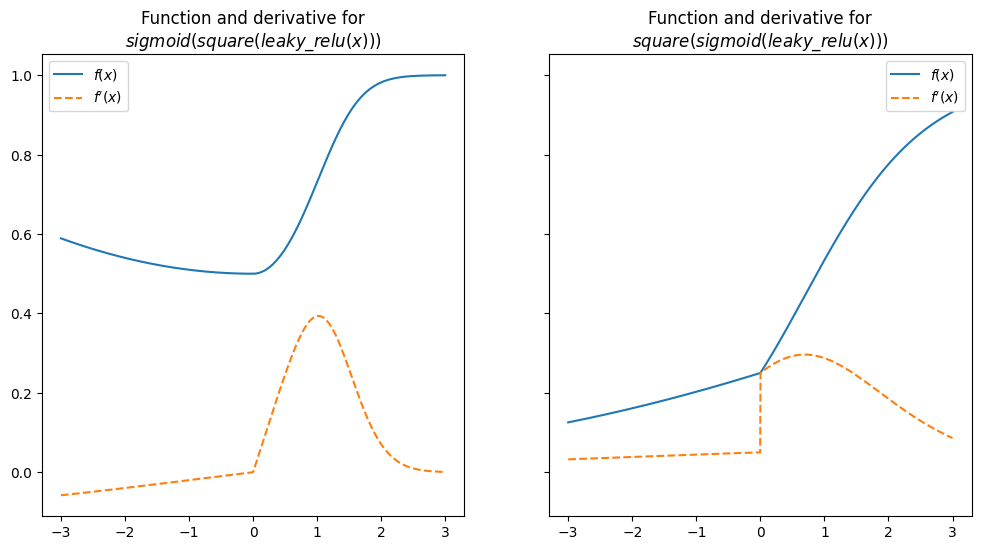

In [14]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

input_range: ndarray = np.linspace(-3, 3, 1000)

chain_1: Chain = [leaky_relu, square, sigmoid]
chain_2: Chain = [leaky_relu, sigmoid, square]

ax[0].plot(input_range, chain_length_3(chain_1, input_range), label="$f(x)$")
ax[0].plot(input_range, chain_deriv_3(chain_1, input_range), ls="--", label="$f^\prime(x)$")
ax[0].set_title("Function and derivative for\n$sigmoid(square(leaky\_relu(x)))$")
ax[0].legend()

ax[1].plot(input_range, chain_length_3(chain_2, input_range), label="$f(x)$")
ax[1].plot(input_range, chain_deriv_3(chain_2, input_range), ls="--", label="$f^\prime(x)$")
ax[1].set_title("Function and derivative for\n$square(sigmoid(leaky\_relu(x)))$")
ax[1].legend()

## Functions with multiple inputs

$$\alpha(x, y)=x+y=a \\
\sigma(a)=s \\
f(x, y)=\sigma(\alpha(x, y))=\sigma(x+y)
$$

In [15]:
def multiple_inputs_add(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    """
    Functions with multiple inputs and addition, forward pass
    """
    assert x.shape == y.shape
    
    a: ndarray = x + y
    return sigma(a)

$$
\because f(x, y) = \sigma(\alpha(x, y))\\
\therefore \frac{\partial f}{\partial x} = \frac{\partial [\sigma(\alpha(x, y))]}{\partial x}
=\frac{\partial\sigma}{\partial\alpha}\times\frac{\partial\alpha}{\partial x}\\
\therefore \frac{\partial f}{\partial x}=\frac{\partial\sigma}{\partial\alpha}\times\frac{\partial\alpha}{\partial x}\\
\therefore \frac{\partial f}{\partial y}=\frac{\partial\sigma}{\partial\alpha}\times\frac{\partial\alpha}{\partial y}
$$

In [16]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    """
    Functions with multiple inputs and addition, forward pass
    """
    
    # forward pass
    a: ndarray = x + y
    
    # compute the derivatives
    dsda = deriv(simga, a)
    
    dadx, dady = 1, 1
    
    return dsda * dadx, dsda * dady

## Function with matrix multiplication

$$
X = \begin{bmatrix}
    x_1 & x_2 & \cdots & x_n
    \end{bmatrix} \hspace{1cm}
W = \begin{bmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_n
    \end{bmatrix}\\
N = \nu \ (X, W) =  X\times W = x_1\times w_1 + x_2\times w_2 + \cdots + x_n\times w_n
$$

In [17]:
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:
    """
    Computes the forward pass of the matrix multiplication
    """
    assert X.shape[1] == W.shape[0],\
    "Number of columns of the first array should be matched with the number of rows of the second array."
    
    # matrix multiplication
    N: ndarray = np.dot(X, W)
    
    return N

## The backward pass

$$
\frac{\partial N}{\partial X} = \begin{bmatrix} \frac{\partial N}{\partial x_1} & \frac{\partial N}{\partial x_2} & \frac{\partial N}{\partial x_3} \end{bmatrix} \\
\because N = x_1\times w_1 + x_2\times w_2 + x_3\times w_3 \\
\therefore \frac{\partial N}{\partial x_1} = w_1 ;\frac{\partial N}{\partial x_2} = w_2;\frac{\partial N}{\partial x_3} = w_3\\
\therefore \frac{\partial N}{\partial X} = \begin{bmatrix}w_1 & w_2 & w_3\end{bmatrix} = W^T \\
\text{Similarly } \frac{\partial N}{\partial W} = X^T 
$$

In [18]:
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:
    """
    Computes the backward pass of a matrix multiplication w.r.t. to the first argument.
    """
    # backward pass
    dNdX = np.transpose(W, (1, 0))
    return dNdX

In [19]:
np.random.seed(10251)

X = np.random.randn(1, 3)
W = np.random.randn(3, 1)

print(*X)
matmul_backward_first(X, W)

[-0.75524864 -0.91304004  0.55405013]


array([[ 0.46065778, -2.37604934, -0.63254705]])

## With an extra function at the end of the matrix multiplication

$$
S =f(X, W)= \sigma(\nu(X, W))
= \sigma(x_1\times w_1 + x_2\times w_2 + x_3\times w_3)
$$

In [20]:
def matrix_forward_extra(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    """
    Computes the forward pass of a function involving matrix multiplication and one extra function
    """
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N: ndarray = np.dot(X, W)
    
    # feeding the output to another function
    S: ndarray = sigma(N)
    
    return S

## The backward pass

$$
\begin{align}
    \frac{\partial f}{\partial X} &= \frac{\partial\sigma}{\partial\nu}\times \frac{\partial\nu}{\partial X}\\
    &=\frac{\partial S}{\partial N}\times \frac{\partial N}{\partial X}\\
    &=\frac{\partial S}{\partial N}\times W^T
\end{align}\\
\boxed{\frac{\partial f}{\partial X}=\frac{\partial S}{\partial N}\times W^T}
$$

In [21]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    """
    Computes the derivative of the matrix function w.r.t. the first element
    """
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N: ndarray = np.dot(X, W)
    
    # feeding the output to another function
    S: ndarray = sigma(N)
    
    # dS/dN
    dSdN = deriv(sigma, N)
    
    # dNdX
    dNdX = np.transpose(W, (1, 0))
    
    return np.dot(dSdN, dNdX)

In [22]:
matrix_function_backward_1(X, W, sigmoid)

array([[ 0.0699715 , -0.36090943, -0.09608058]])

In [23]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [24]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.1]])

In [25]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

-0.1

## Matrix function with two 2D matrices

$$
\begin{align*}
    X = \begin{bmatrix}
        x_{11} & x_{12} & x_{13} \\
        x_{21} & x_{22} & x_{23} \\
        x_{31} & x_{32} & x_{33}
    \end{bmatrix} \hspace{1cm} 
    W = \begin{bmatrix}
        w_{11} & w_{12} \\
        w_{21} & w_{22} \\
        w_{31} & w_{32}
    \end{bmatrix}
\end{align*}\\ \\
N = \nu \ (X, W)\\
S = \sigma(N) = \sigma(\nu \ (X, W)) \\
L = \Lambda(S) = \Lambda(\sigma(\nu \ (X, W))) 
$$

$$
\begin{align*}
    X\times W &= \begin{bmatrix}
    x_{11}\times w_{11} + x_{12}\times w_{21} + x_{13}\times w_{31} & x_{11}\times w_{12} + x_{12}\times w_{22} + x_{13}\times w_{32} \\
    x_{21}\times w_{11} + x_{22}\times w_{21} + x_{23}\times w_{31} & x_{21}\times w_{12} + x_{22}\times w_{22} + x_{23}\times w_{32}\\
    x_{31}\times w_{11} + x_{32}\times w_{21} + x_{33}\times w_{31} & x_{31}\times w_{12} + x_{32}\times w_{22} + x_{33}\times w_{32}
    \end{bmatrix}\\
    &=\begin{bmatrix}
    XW_{11} & XW_{12} \\
    XW_{21} & XW_{22} \\
    XW_{31} & XW_{32}
    \end{bmatrix} = N\\
    \therefore \sigma(X\times W) &= \begin{bmatrix}
    \sigma(XW_{11}) & \sigma(XW_{12}) \\
    \sigma(XW_{21}) & \sigma(XW_{22}) \\
    \sigma(XW_{31}) & \sigma(XW_{32})
    \end{bmatrix} = S\\
    \therefore \Lambda(\sigma(X\times W)) &= \Lambda \left( \begin{bmatrix}
    \sigma(XW_{11}) & \sigma(XW_{12}) \\
    \sigma(XW_{21}) & \sigma(XW_{22}) \\
    \sigma(XW_{31}) & \sigma(XW_{32})
    \end{bmatrix}\right) = L\\
    L &= \sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})
\end{align*}
$$

In [26]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

## The backward pass

$$
\begin{align*}
    \frac{\partial L}{\partial X} &= \frac{\partial}{\partial X}\left[\Lambda(\sigma(\nu \ (X, W)))\right]\\
    &=\frac{\partial \Lambda}{\partial [\sigma(\nu \ (X, W))]} \times \frac{\partial [\sigma(\nu \ (X, W))]}{\partial X}\\
    &=\frac{\partial \Lambda}{\partial [\sigma(\nu \ (X, W))]} \times \frac{\partial \sigma}{\partial [\nu \ (X, W)]} \times \frac{\partial [\nu \ (X, W)]}{\partial X}\\
    &=\frac{\partial L}{\partial S} \times \frac{\partial S}{\partial N} \times \frac{\partial N}{\partial X}
\end{align*}\\
\boxed{\frac{\partial L}{\partial X} = \frac{\partial L}{\partial S} \times \frac{\partial S}{\partial N} \times \frac{\partial N}{\partial X}}
$$

$$
\begin{align*}
    \frac{\partial L}{\partial S} &= \begin{bmatrix}
        \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{11})]} & \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{12})]}  \\
        \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{21})]} & \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{22})]}  \\
        \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{31})]} & \frac{\partial [\sigma(XW_{11}) + \sigma(XW_{12}) + \sigma(XW_{21}) + \sigma(XW_{22}) + \sigma(XW_{31}) + \sigma(XW_{32})]}{\partial [\sigma(XW_{32})]} 
    \end{bmatrix}
    = \begin{bmatrix}
        1 & 1 \\
        1 & 1 \\
        1 & 1
    \end{bmatrix}
\end{align*}
$$

$$
\begin{align}
    \frac{\partial S}{\partial N} = \begin{bmatrix}
        \frac{\partial S}{\partial (XW_{11})} & \frac{\partial S}{\partial (XW_{12})}\\
        \frac{\partial S}{\partial (XW_{21})} & \frac{\partial S}{\partial (XW_{22})}\\
        \frac{\partial S}{\partial (XW_{31})} & \frac{\partial S}{\partial (XW_{32})}
    \end{bmatrix}
\end{align}
$$

$$
\begin{align}
    \frac{\partial L}{\partial N} &= \frac{\partial L}{\partial S} \times \frac{\partial S}{\partial N}\\
    & =\begin{bmatrix}
        1 & 1 \\
        1 & 1 \\
        1 & 1
    \end{bmatrix} \times \begin{bmatrix}
        \frac{\partial S}{\partial (XW_{11})} & \frac{\partial S}{\partial (XW_{12})}\\
        \frac{\partial S}{\partial (XW_{21})} & \frac{\partial S}{\partial (XW_{22})}\\
        \frac{\partial S}{\partial (XW_{31})} & \frac{\partial S}{\partial (XW_{32})}
    \end{bmatrix} = \begin{bmatrix}
        \frac{\partial S}{\partial (XW_{11})} & \frac{\partial S}{\partial (XW_{12})}\\
        \frac{\partial S}{\partial (XW_{21})} & \frac{\partial S}{\partial (XW_{22})}\\
        \frac{\partial S}{\partial (XW_{31})} & \frac{\partial S}{\partial (XW_{32})}
    \end{bmatrix}
\end{align}
$$

$$
\begin{align}
    \frac{\partial N}{\partial X} &= W^T
\end{align}
$$

$$
\begin{align*}
    \boxed{\frac{\partial L}{\partial X} = \frac{\partial L}{\partial S} \times \frac{\partial S}{\partial N} \times W^T}
\end{align*}
$$
The first multiplication is elementwise and the second multiplication is a matrix multiplication

In [27]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)
    
    # dL/dS
    dLdS = np.ones_like(S)
    
    # dS/dN
    dSdN = deriv(sigma, N)
    
    # dL/dN
    dLdN = dLdS * dSdN
    
    # dN/dX
    dNdX = np.transpose(W, (1, 0))
    
    # dL/dX
    dLdX = np.dot(dSdN, dNdX)
    
    return dLdX

In [28]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

X

array([[-1.57752816, -0.6664228 ,  0.63910406],
       [-0.56152218,  0.73729959, -1.42307821],
       [-1.44348429, -0.39128029,  0.1539322 ]])

In [29]:
round(matrix_function_forward_sum(X, W, sigmoid), 4)

2.3755

In [30]:
matrix_function_backward_sum_1(X, W, sigmoid)

array([[ 0.2488887 , -0.37478057,  0.01121962],
       [ 0.12604152, -0.27807404, -0.13945837],
       [ 0.22992798, -0.36623443, -0.02252592]])